<a href="https://colab.research.google.com/github/Ianclrs/Ecommerce-API/blob/main/Desafio_Envoltoria_Convexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagem normal:


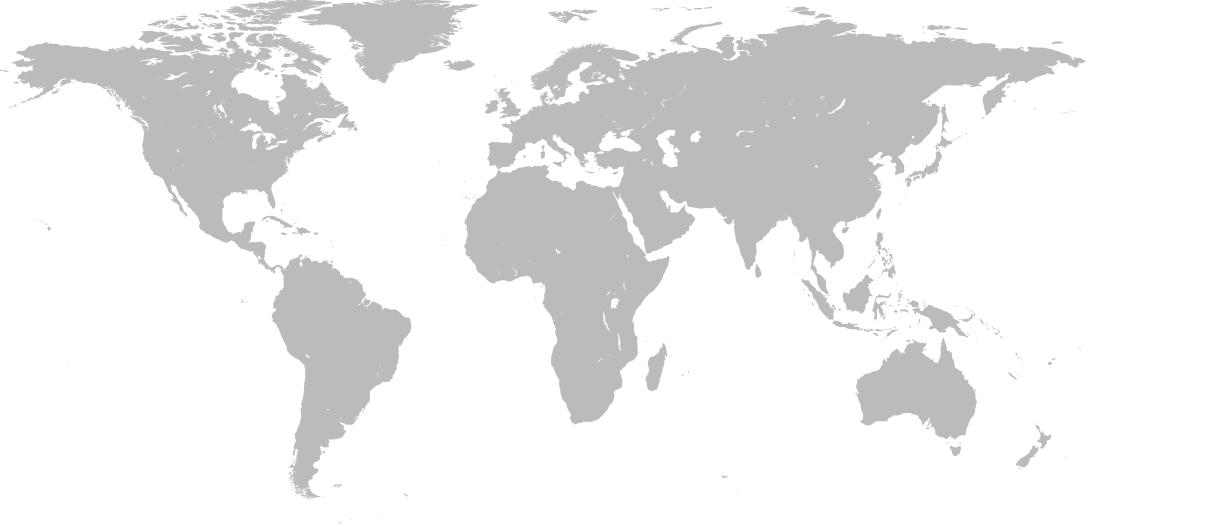

Imagem na escala de cinza:


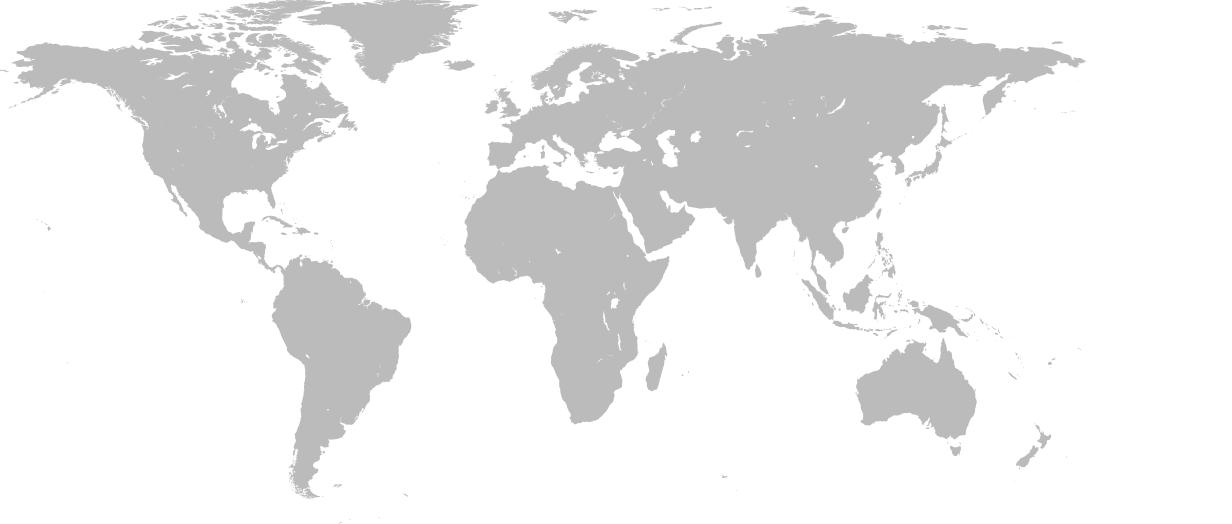

Imagem com blur para retirar ruido:


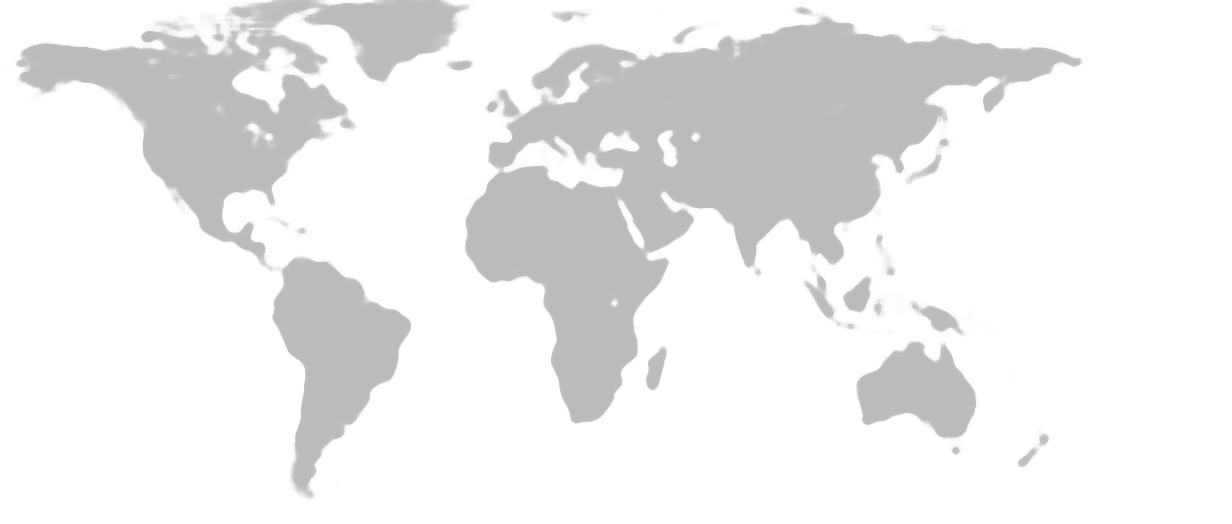

Imagem binarizada para identificar os pontos de interesse:


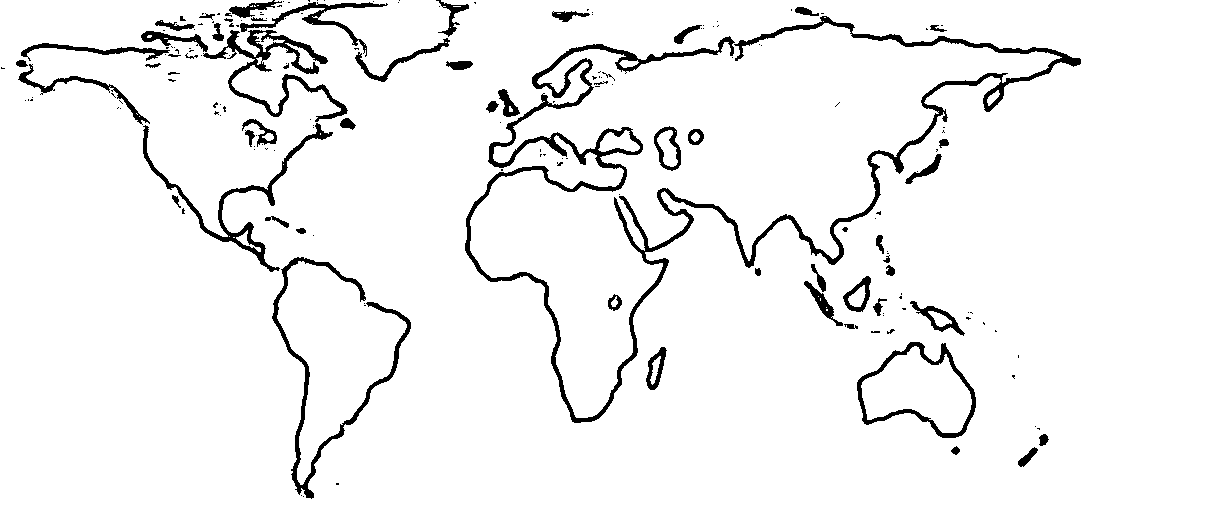

Imagem resultante:
Contorno Original (Verde) vs. Envoltória Convexa (Vermelho)


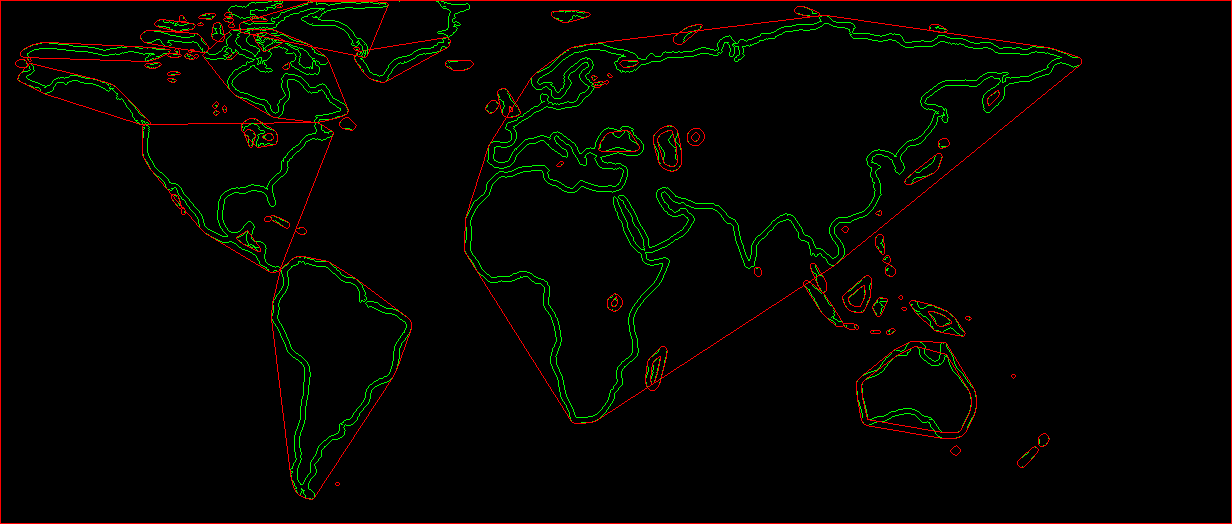

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Le e mostra imagem
imagem = '/content/drive/My Drive/sample.jpg' #a imagem tem que estar no drive
imagem_lida = cv2.imread(imagem)
print("Imagem normal:")
cv2_imshow(imagem_lida)

# Imagem na escala de cinza
imagem_cinza = cv2.cvtColor(imagem_lida, cv2.COLOR_BGR2GRAY)
print("Imagem na escala de cinza:")
cv2_imshow(imagem_cinza)

# Imagem com blur
print("Imagem com blur para retirar ruido:")
imagem_blur = cv2.medianBlur(imagem_cinza, 9)
cv2_imshow(imagem_blur)

# Imagem binarizada
print("Imagem binarizada para identificar os pontos de interesse:")
imagem_binarizada = cv2.adaptiveThreshold(imagem_blur, 255,
                                          cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
cv2_imshow(imagem_binarizada)

# Imagem resultante
print("Imagem resultante:")
contours, hierarchy = cv2.findContours(imagem_binarizada.copy(),
                                      cv2.RETR_TREE,
                                      cv2.CHAIN_APPROX_SIMPLE)

height, width, _ = imagem_lida.shape
imagem_resultado = np.zeros((height, width, 3), dtype=np.uint8)

if contours:
  for c in contours:
    if cv2.contourArea(c) < 10:
      continue
    hull = cv2.convexHull(c)

    #Contorno original (em verde)
    cv2.drawContours(imagem_resultado, [c], 0, (0, 255, 0), 1)

    #Envoltória convexa (em vermelho)
    cv2.drawContours(imagem_resultado, [hull], 0, (0, 0, 255), 1)

  print("Contorno Original (Verde) vs. Envoltória Convexa (Vermelho)")
  cv2_imshow(imagem_resultado)

else:
    print("Nenhum contorno foi encontrado.")

cv2.waitKey(0)
cv2.destroyAllWindows()